## Read in one day of waveform data from one station from miniseed file
## Parse earthquake catalog for times of earthquakes for that day
## Plot a window around each of those earthquake times!

In [15]:
import pickle
from datetime import datetime
from datetime import timedelta
import obspy
from obspy.clients.fdsn.client import Client

In [16]:
# Read in earthquake times
with open('eq_times', 'rb') as f:
    eq_times = pickle.load(f)

In [17]:
# Get earthquake times for the desired day
t1 = datetime(2023,7,13)
t2 = t1 + timedelta(days=1)
day_times = [t for t in eq_times if (t>t1) & (t<t2)]

In [23]:
# Read in waveform data from miniseed
st = obspy.read('AXAS1_20230713.mseed')

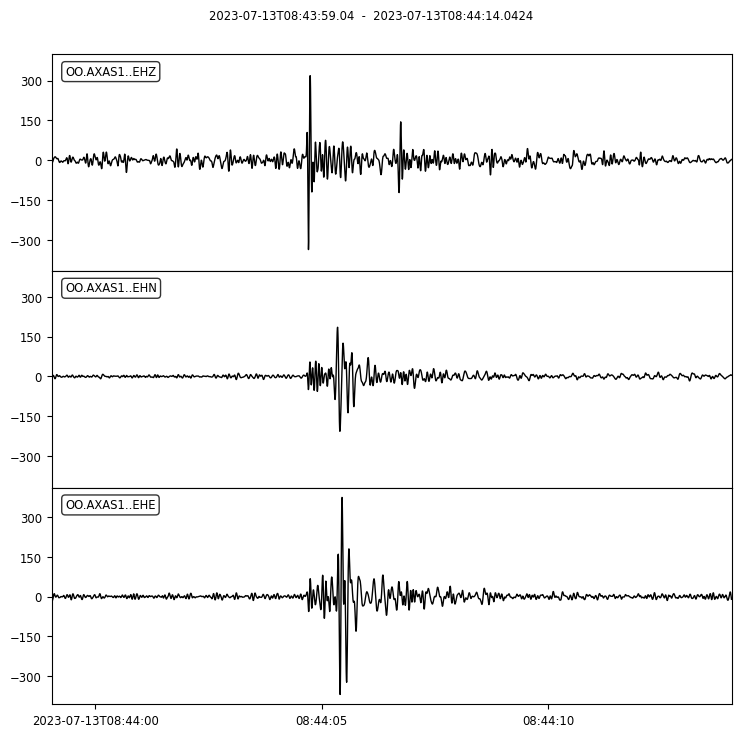

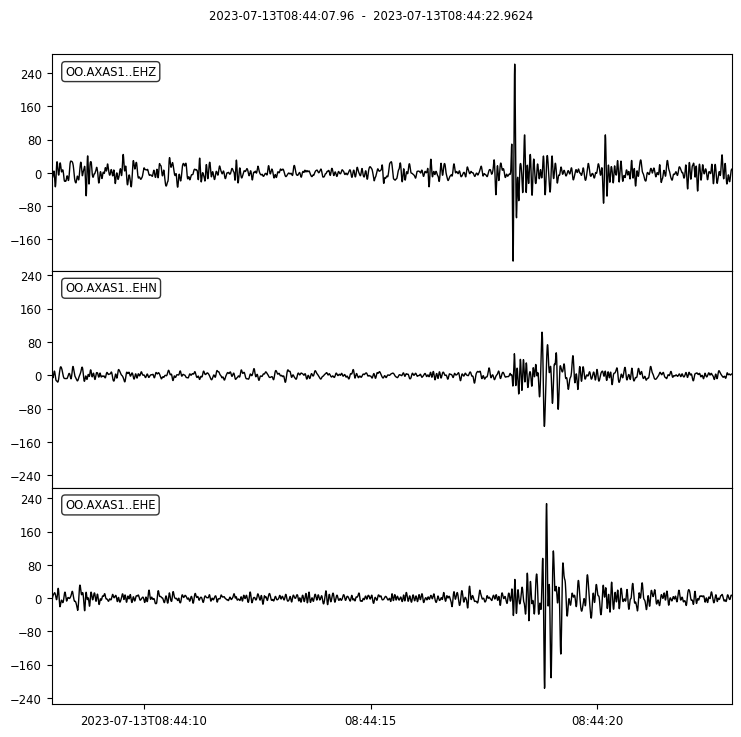

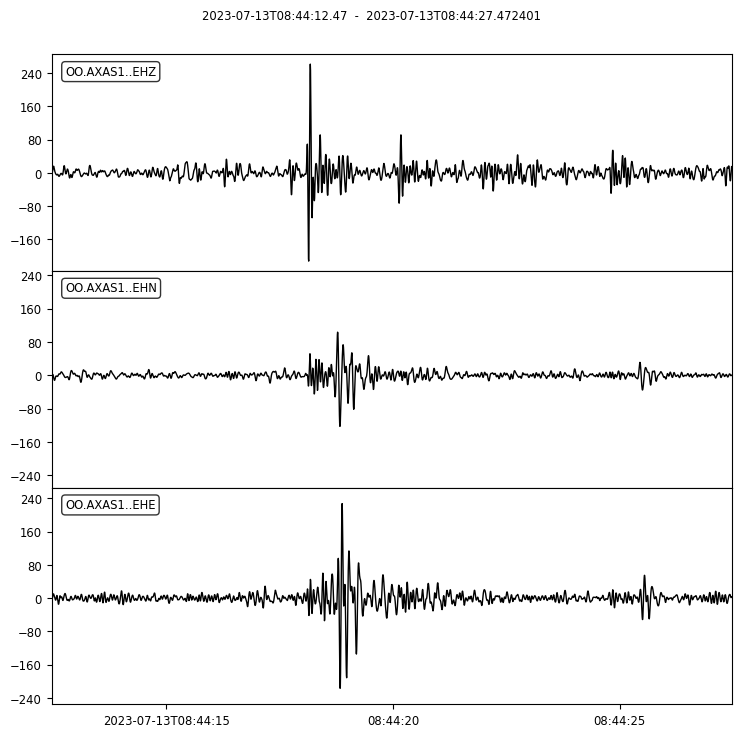

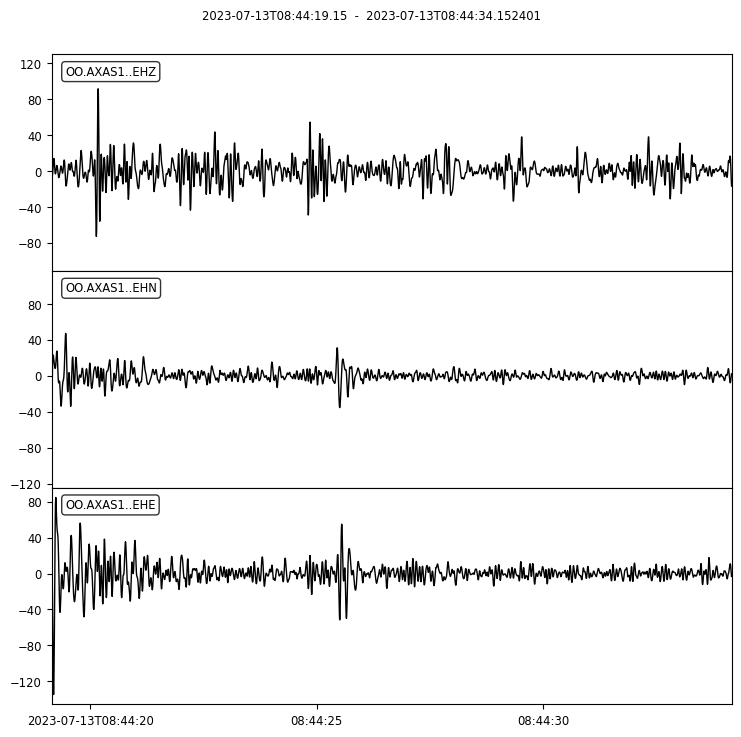

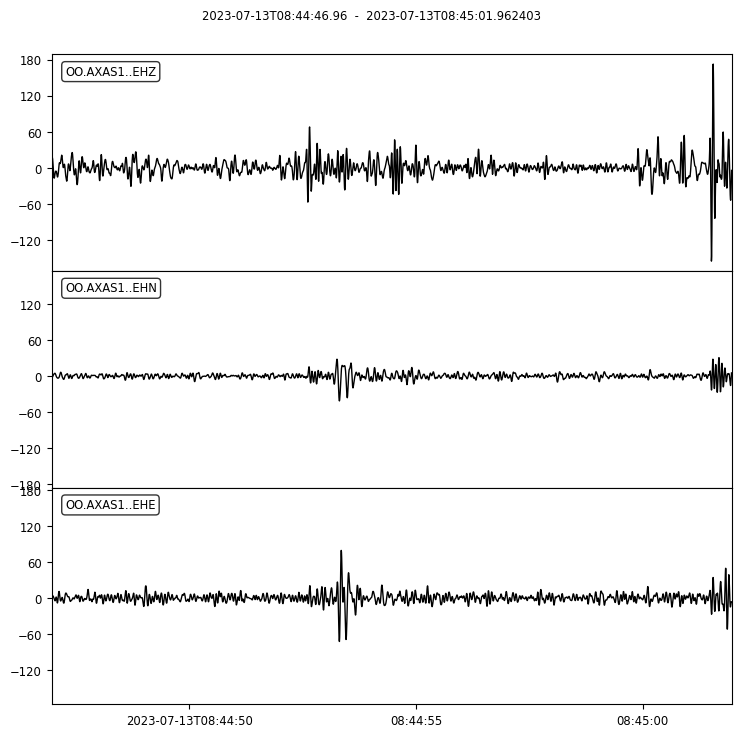

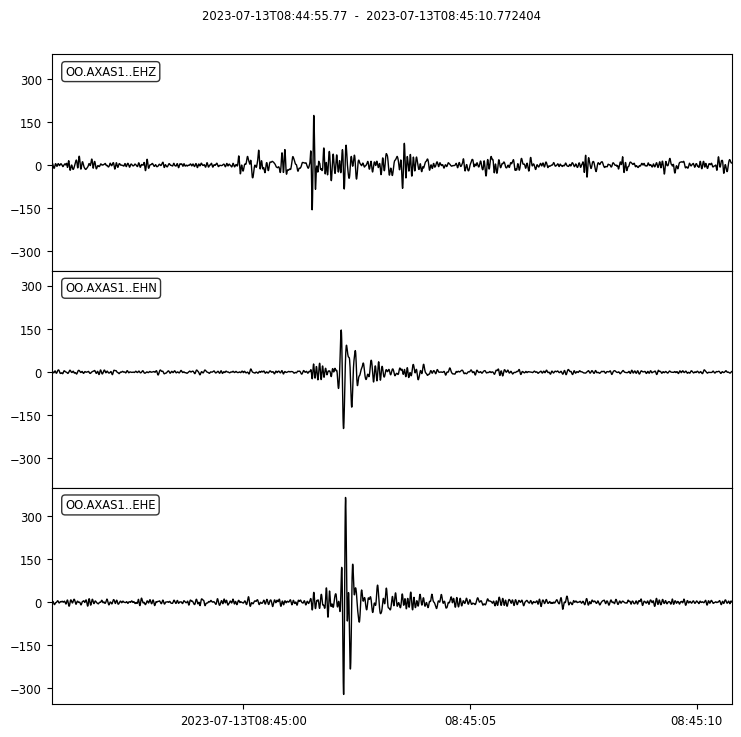

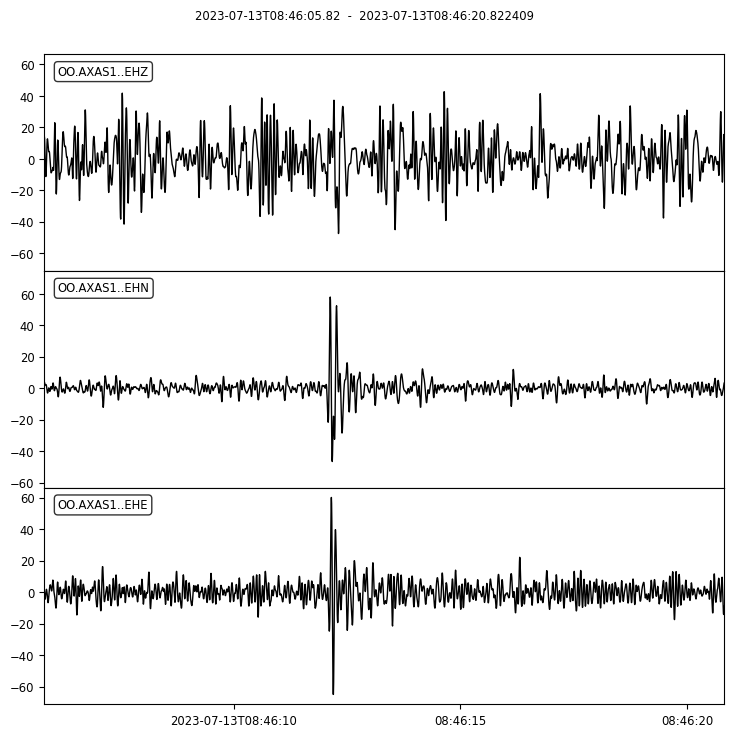

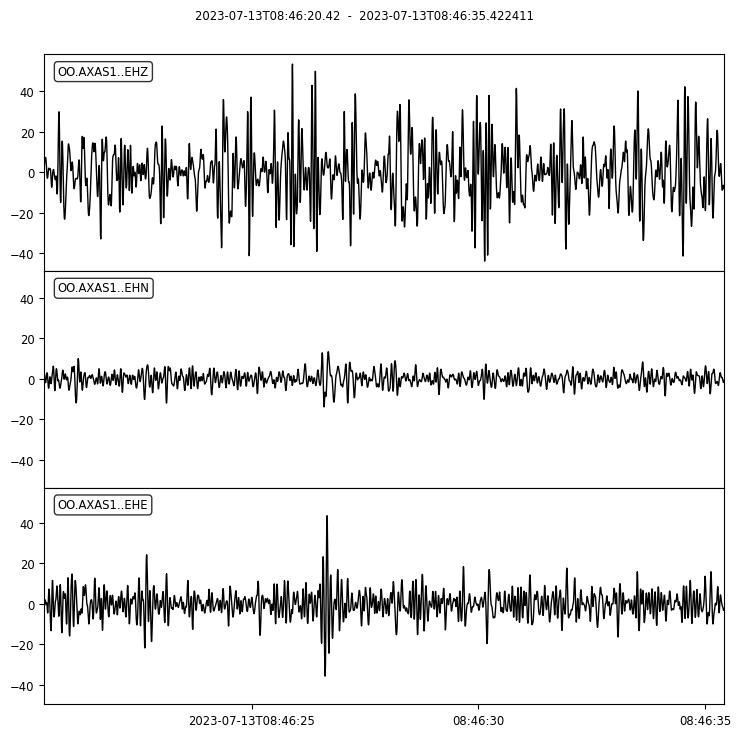

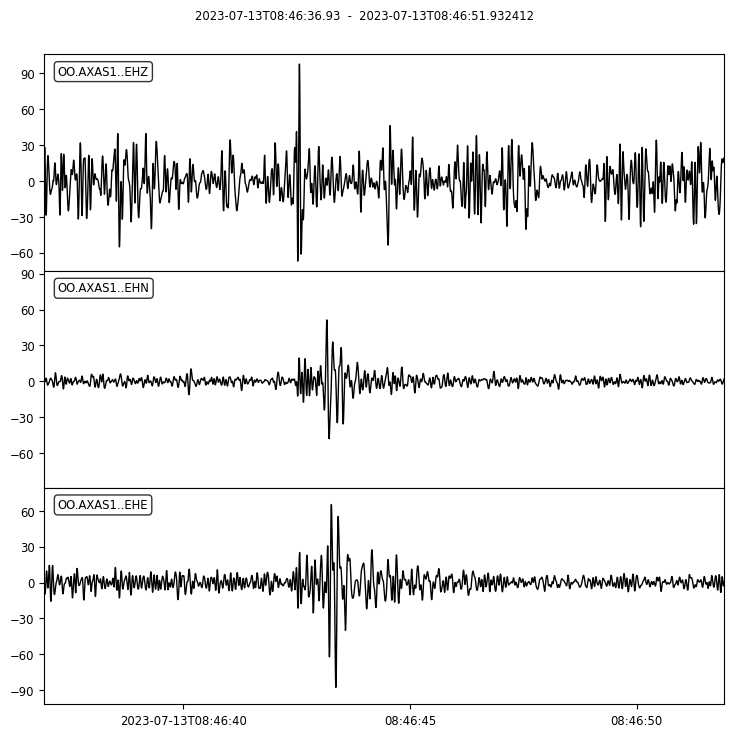

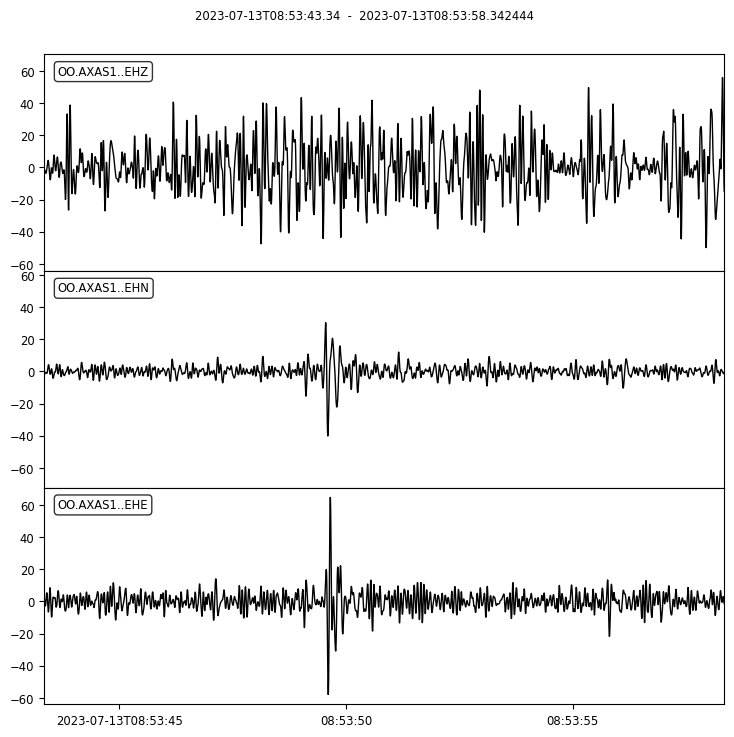

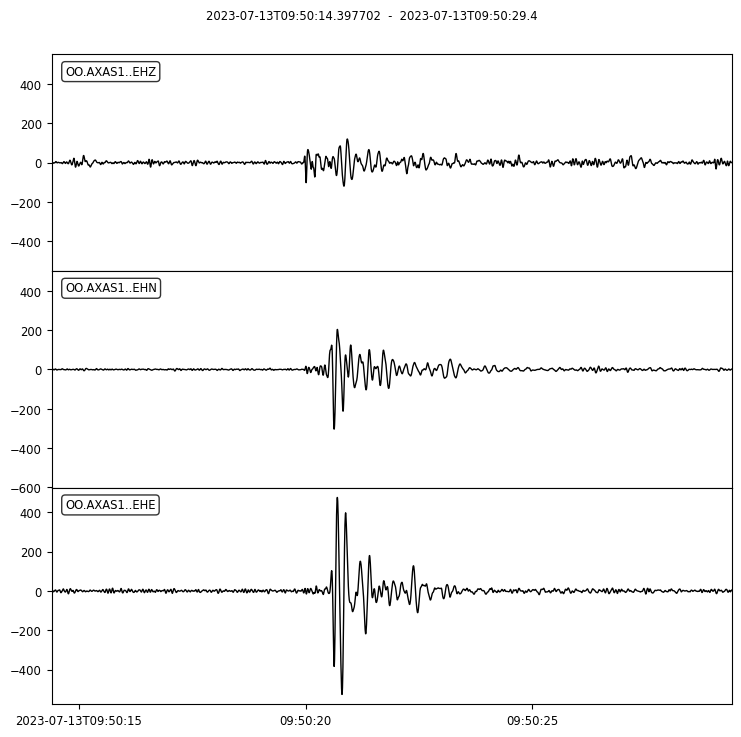

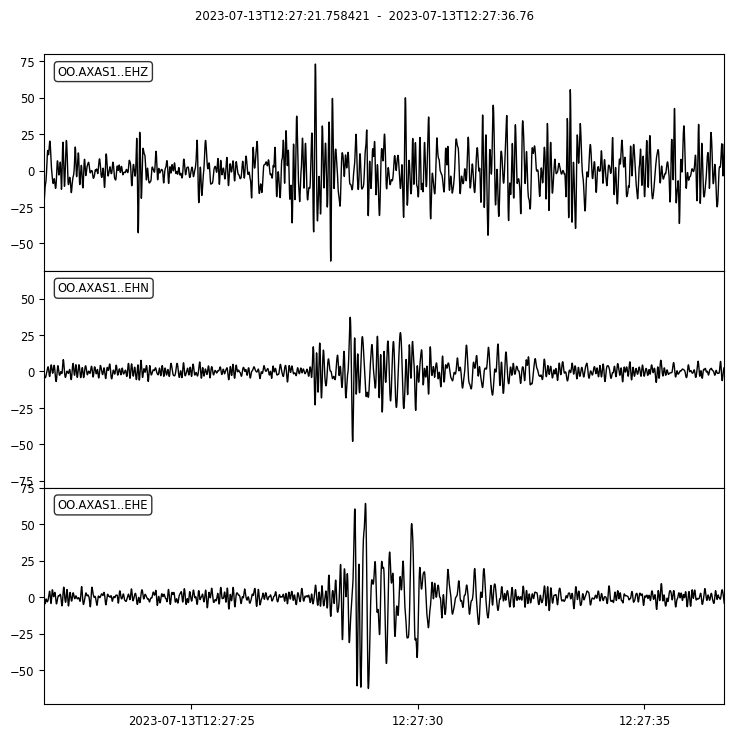

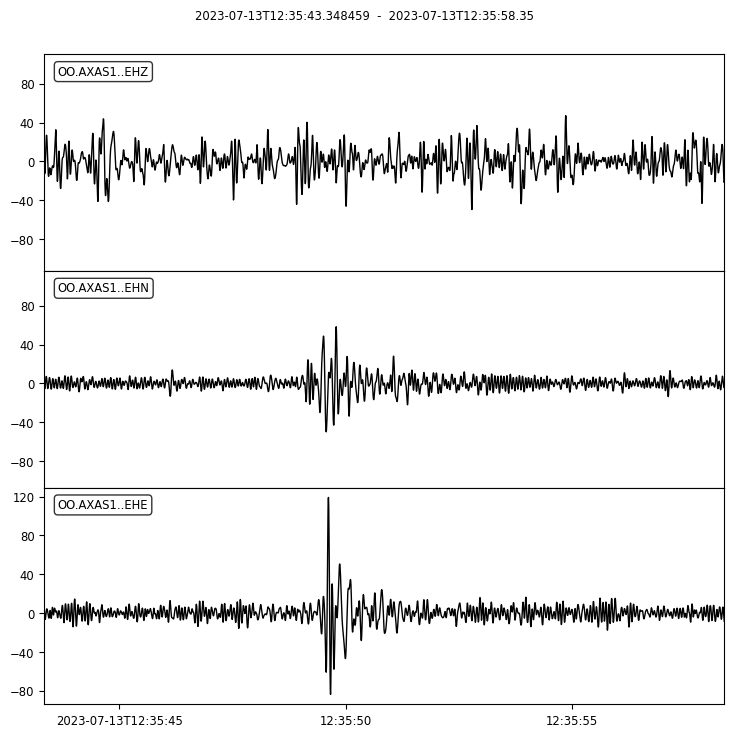

In [25]:
# Cut around earthquake times and plot
for t in day_times:
    start = obspy.UTCDateTime(t) - 10
    end = obspy.UTCDateTime(t) + 15
    cut_st = st.copy().trim(start,end)
    cut_st.filter('bandpass',freqmin=4,freqmax=15)
    cut_st.trim(obspy.UTCDateTime(t)-5,obspy.UTCDateTime(t)+10)
    cut_st.plot();